# Entorno de trabajo: Crear un dataset de noticias de prensa a partir del motor de búsqueda Sophia

Este notebook muestra una manera de extraer noticias desde el motor de búsqueda de _Sophia_, a partir de una **palabra clave**, un **país** y un **periodo de tiempo**.


_Sophia_ es un proyecto I+i+D desarrollado en la Universidad Austral de Chile desde 2019. El motor de búsqueda se encuentra en fase de mejoramiento continuo. Por cualquier pregunta o problema técnica con este notebook, no dudar en contactarme por Discord (@MatthieuVernier) o por correo mvernier@inf.uach.cl.

## 0. Librerías útiles

- Elasticsearch es el motor de búsqueda utilizado por Sophia
- Requiere la instalación del paquete elasticsearch

In [6]:
!python -V

Python 3.9.12


In [7]:
#!pip install elasticsearch

In [8]:
import elasticsearch
from datetime import datetime

In [9]:
elasticsearch.__version__

(7, 17, 0)

## 1. Parámetros de la búsqueda

Características del motor de búsqueda:  
- El formato de las fechas es: YYYY-MM-DD
- El motor de búsqueda incluye noticias por distintos paises, pero se recomienda utilizar "chile" por el momento.
- El motor de búsqueda incluye datos entre el año 2000 y el año 2021.

In [10]:
country="chile"
from_="2021-09-16"
to_="2021-09-23"
media_outlets=["elllanquihue","elaustral","laestrelladechiloe","elheraldoaustral","radiosago",
               "elrepuertero","elvacanudo","elhuemul","seminariolocal","elquellonino","elinsular",
               "radiopudeto","radioacogida","elcalbucano","segundos33",
               "prensadelestuario","fresiaahora","soychiloe"]

#keyword=""
simple_keyword=False

## 2. Parámetros de conexión al motor de búsqueda de Sophia

In [11]:
IP = "search.sophia2.org"
PORT = 9200
USER= "elastic"
PASS= "dummy_elastic"

In [12]:
#NO MODIFICAR

es = elasticsearch.Elasticsearch(
    IP,
    #port=PORT,
    http_auth=(USER, PASS)
)

## 3. Búsqueda de noticias de prensa

- Preparación de la consulta en el formato solicitado por Elasticsearch

In [13]:
#NO MODIFICAR
match=""
if (simple_keyword):
    match="match"
else:
    match="match_phrase"

query = { 
    "bool": { 
      #"must": [
      #  {match: { "text":keyword}}

      #],
    "filter": [
        {"range": {
      "date": {
        "gte": from_,
        "lt": to_
      }}},
        { "term":  { "country": country }},
        { "terms":  { "media_outlet": media_outlets }} 
    ]
    }  
}

- Envio de la consulta
- No se puede devolver más de 10.000 noticias. En caso de obtener 10.000 respuestas, se recomienda buscar en un periodo de tiempo más corto o modificar la consulta.

In [14]:
res = es.search(index="news", query=query, size=10000)
print("Son %d noticias encontradas..." % res['hits']['total']['value'])

Son 1502 noticias encontradas...


# d

In [15]:
import pandas as pd

data = {'id_news':[],'country':[],'media_outlet':[],'url':[],'title':[],'text':[],'date':[]}

df = pd.DataFrame(data)  
  
for hit in res['hits']['hits']:
    id_news = hit['_source']['id_news']
    country = hit['_source']['country']
    media_outlet = hit['_source']['media_outlet']
    url = hit['_source']['url']
    title = hit['_source']['title']
    text = hit['_source']['text']
    date = hit['_source']['date']
    
    new_row = {'id_news':id_news, 'country':country, 'media_outlet':media_outlet, 'url':url, 'title':title, 'text':text, 'date':date}
    
    df = df.append(new_row, ignore_index=True)

df

C:\Users\Spun\AppData\Local\Temp\ipykernel_3368\3725804544.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(new_row, ignore_index=True)
C:\Users\Spun\AppData\Local\Temp\ipykernel_3368\3725804544.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(new_row, ignore_index=True)
C:\Users\Spun\AppData\Local\Temp\ipykernel_3368\3725804544.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(new_row, ignore_index=True)
C:\Users\Spun\AppData\Local\Temp\ipykernel_3368\3725804544.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(new_row, ignore_index=True)
C:\Users\Spun\AppData\Lo

,id_news,country,media_outlet,url,title,text,date
0,21888180.0,chile,radiosago,https://www.radiosago.cl/comienza-celebracion-...,Comienza celebración dieciochera de la “Fiesta...,Un recorrido por los locales en el Parque La ...,2021-09-18
1,21888220.0,chile,radiosago,https://www.radiosago.cl/incautan-drogas-armas...,"Incautan drogas, armas blancas y celulares en ...",Exhaustiva revisión de encomiendas y allanami...,2021-09-17
2,21912925.0,chile,radiosago,https://www.radiosago.cl/postularan-a-la-carre...,Postularán a la Carretera Austral desde Puerto...,El Programa Territorial Integrado Ruta de los...,2021-09-21
3,21912928.0,chile,radiosago,https://www.radiosago.cl/senador-quinteros-lle...,Senador Quinteros lleva conflicto del Institut...,La comisión de Educación del Senado determinó...,2021-09-22
4,21912942.0,chile,radiosago,https://www.radiosago.cl/preocupacion-en-hospi...,Preocupación en Hospital de Ancud por Cámara H...,Ello porque existe la posibilidad que la Cámar...,2021-09-16
...,...,...,...,...,...,...,...
1497,47526891.0,chile,laestrelladechiloe,https://www.laestrellachiloe.cl/impresa/2021/0...,Anticipan claves del mercado laboral en el últ...,Las últimas cifras de empleo en Chile son alen...,2021-09-21
1498,47526892.0,chile,laestrelladechiloe,https://www.laestrellachiloe.cl/impresa/2021/0...,Experta enseñó a diferenciar ganglios malignos...,Más de 1.400 casos de Linfoma no Hodgkin se di...,2021-09-21
1499,47526893.0,chile,laestrelladechiloe,https://www.laestrellachiloe.cl/impresa/2021/0...,"""A mis 42 años siento que encontré la madurez....","Justo antes de la pandemia, Benjamín Vicuña vi...",2021-09-21
1500,47526894.0,chile,laestrelladechiloe,https://www.laestrellachiloe.cl/impresa/2021/0...,"Young Cister:""Me veo en un festival cantando c...","Con 24 años, Esteban Cisterna, mejor conocido ...",2021-09-21


In [16]:
df.head(5)

,id_news,country,media_outlet,url,title,text,date
0,21888180.0,chile,radiosago,https://www.radiosago.cl/comienza-celebracion-...,Comienza celebración dieciochera de la “Fiesta...,Un recorrido por los locales en el Parque La ...,2021-09-18
1,21888220.0,chile,radiosago,https://www.radiosago.cl/incautan-drogas-armas...,"Incautan drogas, armas blancas y celulares en ...",Exhaustiva revisión de encomiendas y allanami...,2021-09-17
2,21912925.0,chile,radiosago,https://www.radiosago.cl/postularan-a-la-carre...,Postularán a la Carretera Austral desde Puerto...,El Programa Territorial Integrado Ruta de los...,2021-09-21
3,21912928.0,chile,radiosago,https://www.radiosago.cl/senador-quinteros-lle...,Senador Quinteros lleva conflicto del Institut...,La comisión de Educación del Senado determinó...,2021-09-22
4,21912942.0,chile,radiosago,https://www.radiosago.cl/preocupacion-en-hospi...,Preocupación en Hospital de Ancud por Cámara H...,Ello porque existe la posibilidad que la Cámar...,2021-09-16


# Analisis de topico

In [17]:
#!python -m spacy download es_core_news_sm

In [18]:
import spacy
from spacy.matcher import Matcher
nlp = spacy.load("es_core_news_sm")
matcher = Matcher(nlp.vocab)

In [19]:
import numpy as np
import pandas as pd

# Gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

# Plotting tools
import pyLDAvis
import pyLDAvis.gensim_models  # don't skip this
import matplotlib.pyplot as plt
%matplotlib inline

c:\Users\Spun\miniconda3\lib\site-packages\past\builtins\misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload


In [20]:
pattern_1 = [{"POS": "NOUN"},{"LOWER": "de"}, {"POS": "NOUN"}]
matcher.add("NOUN-de-NOUN", [pattern_1])

pattern_2 = [{"POS": "NOUN"}, {"POS": "ADJ"}]
matcher.add("NOUN-ADJ", [pattern_2])

In [21]:
def text_to_list(noticia):
    list_of_words = []
    
    try:
        doc = nlp(noticia)

        for token in doc:
            if (token.pos_=="NOUN"):
                list_of_words.append(token.text)

        for ent in doc.ents:
            if (ent.label_ == "PER" and " " in ent.text):
                list_of_words.append(ent.text)

        matches = matcher(doc)

        for match_id, start, end in matches:
            span = doc[start:end]  # The matched span
            list_of_words.append(span.text)
    
    except Exception as e: 
        print(noticia)
        print(e)
    
    return list_of_words

In [22]:
noticias = df.text.values.tolist()

In [23]:
noticias[0]

' Un recorrido por los locales en el Parque La Paloma realizó el alcalde Gervoy Paredes en el inicio de la Fiesta de la Chilenidad, que arrancó este viernes y se extiende hasta este sábado y domingo, en el retorno de los espectáculos masivos en la capital regional, respetando los aforos para actividades de este tipo, de acuerdo al Plan Paso a Paso del Ministerio de Salud. Junto a los concejales Fernando España y Luis Vargas y del diputado Alejandro Bernales, pudieron ver la labor de los fonderos en dejar todos sus puestos disponibles para la atención del público, como del personal municipal para que todo quede en orden. Durante la visita, el alcalde Gervoy Paredes señaló que “esperamos que la comunidad disfrute de este evento, asista en familia y de manera responsable en la celebración de estas Fiestas Patrias, disfrutar con moderación y estar respetando las distintas indicaciones”. Respecto a algunas dudas en el tema sanitario, el director de Salud Municipal, Miguel Aravena comentó qu

In [24]:
text_to_list(noticias[0])

['recorrido',
 'locales',
 'alcalde',
 'inicio',
 'viernes',
 'sábado',
 'domingo',
 'retorno',
 'espectáculos',
 'capital',
 'aforos',
 'actividades',
 'tipo',
 'acuerdo',
 'concejales',
 'diputado',
 'labor',
 'fonderos',
 'puestos',
 'atención',
 'público',
 'personal',
 'orden',
 'visita',
 'alcalde',
 'comunidad',
 'evento',
 'asista',
 'familia',
 'manera',
 'celebración',
 'moderación',
 'indicaciones',
 'Respecto',
 'dudas',
 'tema',
 'director',
 'personas',
 'años',
 'carnet',
 'vacunación',
 'diferencia',
 'personas',
 'años',
 'edad',
 'padre',
 'madre',
 'tutor',
 'respecto',
 'calendario',
 'vacunación',
 'niños',
 'jóvenes',
 'evento',
 'fin',
 'semana',
 'horario',
 'horas',
 'música',
 'vivo',
 'horas',
 'gastronomía',
 'juegos',
 'actividades',
 'directora',
 'cabo',
 'fiesta',
 'inconvenientes',
 'aforos',
 'personas',
 'sector',
 'público',
 'problemas',
 'ciudadanía',
 'medidas',
 'cédula',
 'identidad',
 'ingreso',
 'controles',
 'temperatura',
 'disposiciones',
 

In [25]:
noticias_procesadas = []

for index, noticia in enumerate(noticias):
    print(index)
    noticia_procesada = text_to_list(noticia)
    noticias_procesadas.append(noticia_procesada)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [26]:
noticias_procesadas[6]

['años',
 'anuncio',
 'inicio',
 'construcción',
 'obras',
 'centro',
 'reinserción',
 'jóvenes',
 'conflicto',
 'justicia',
 'avance',
 'entrega',
 'parte',
 'visita',
 'terreno',
 'delegado',
 'directora',
 'profesionales',
 'dirección',
 'arquitectura',
 'recorrido',
 'obra',
 'avance',
 'infraestructura',
 'dignidad',
 'jóvenes',
 'infractores',
 'ley',
 'respecto',
 'año',
 'oportunidad',
 'inserción',
 'jóvenes',
 'deuda',
 'sociedad',
 'directora',
 'cambio',
 'término',
 'estándares',
 'infraestructura',
 'trabajo',
 'reinserción',
 'adolescentes',
 'reinserción',
 'inversión',
 'millones',
 'pesos',
 'recursos',
 'capacidad',
 'jóvenes',
 'equipos',
 'interior',
 'escuela',
 'talleres',
 'formación',
 'unidad',
 'intervención',
 'consumo',
 'alcohol',
 'drogas',
 'dependencias',
 'infraestructura',
 'momentos',
 'proceso',
 'separación',
 'octubre',
 'año',
 'servicio',
 'área',
 'protección',
 'derechos',
 'tiempo',
 'paso',
 'procesos',
 'intervención',
 'adolescentes',
 'Ca

# LDA

In [27]:
#Crear Diccionario
id2word = corpora.Dictionary(noticias_procesadas)
id2word

In [28]:
len(id2word)

19410

In [29]:
id2word[0]

'Alejandro Bernales'

In [30]:
id2word[1]

'Desarrollo Comunitario'

In [31]:
texts = noticias_procesadas

In [32]:
dataset = [id2word.doc2bow(noticia_procesada) for noticia_procesada in noticias_procesadas]

# View
print(dataset[:5])

[[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 2), (11, 1), (12, 2), (13, 2), (14, 1), (15, 1), (16, 1), (17, 1), (18, 2), (19, 1), (20, 1), (21, 1), (22, 1), (23, 1), (24, 1), (25, 1), (26, 1), (27, 1), (28, 1), (29, 1), (30, 1), (31, 1), (32, 1), (33, 1), (34, 1), (35, 1), (36, 1), (37, 1), (38, 1), (39, 1), (40, 1), (41, 1), (42, 1), (43, 1), (44, 1), (45, 1), (46, 1), (47, 1), (48, 1), (49, 2), (50, 2), (51, 1), (52, 1), (53, 1), (54, 1), (55, 1), (56, 1), (57, 1), (58, 2), (59, 1), (60, 2), (61, 1), (62, 1), (63, 1), (64, 1), (65, 1), (66, 1), (67, 1), (68, 1), (69, 1), (70, 1), (71, 1), (72, 2), (73, 1), (74, 1), (75, 1), (76, 1), (77, 1), (78, 1), (79, 1), (80, 1), (81, 1), (82, 1), (83, 1), (84, 1), (85, 1), (86, 1), (87, 3), (88, 1), (89, 1), (90, 1), (91, 1), (92, 2), (93, 1), (94, 1), (95, 1), (96, 1), (97, 1), (98, 1), (99, 1), (100, 1), (101, 1), (102, 1), (103, 1), (104, 1), (105, 1), (106, 1), (107, 1), (108, 1), (109, 1), (110, 1)

In [33]:
lda_model = gensim.models.ldamodel.LdaModel(corpus=dataset,
                                           id2word=id2word,
                                           num_topics=5, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)

In [34]:
lda_model.save('./Documents')

In [35]:
from pprint import pprint

pprint(lda_model.print_topics(num_words=100))

[(0,
  '0.006*"equipo" + 0.006*"partido" + 0.006*"puntos" + 0.005*"minutos" + '
  '0.005*"años" + 0.005*"fecha" + 0.004*"parte" + 0.004*"partidos" + '
  '0.004*"horas" + 0.004*"lugar" + 0.003*"tiempo" + 0.003*"duelo" + '
  '0.003*"jugador" + 0.003*"juego" + 0.003*"puesto" + 0.003*"manera" + '
  '0.003*"\'" + 0.003*"encuentro" + 0.003*"víctima" + 0.003*"final" + '
  '0.003*"semana" + 0.002*"país" + 0.002*"cuenta" + 0.002*"punto" + '
  '0.002*"trabajo" + 0.002*"ataque" + 0.002*"vez" + 0.002*"caso" + '
  '0.002*"número" + 0.002*"triunfo" + 0.002*"jugadores" + 0.002*"serie" + '
  '0.002*"resultado" + 0.002*"club" + 0.002*"lesiones" + 0.002*"joven" + '
  '0.002*"momento" + 0.002*"hora" + 0.002*"domingo" + 0.002*"sentencia" + '
  '0.002*"prueba" + 0.002*"antecedentes" + 0.002*"mujer" + 0.002*"cancha" + '
  '0.002*"cuerpo" + 0.002*"hecho" + 0.002*"victoria" + 0.002*"grupo" + '
  '0.002*"local" + 0.002*"días" + 0.002*"casa" + 0.002*"temporada" + '
  '0.002*"gol" + 0.002*"cosas" + 0.002*"invest

In [36]:
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(lda_model, dataset, id2word)
vis

c:\Users\Spun\miniconda3\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  default_term_info = default_term_info.sort_values(


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
2      0.088352  0.055482       1        1  23.875945
3      0.077119 -0.092093       2        1  21.386469
1      0.095601 -0.144902       3        1  20.828016
0      0.037640  0.208928       4        1  17.687377
4     -0.298711 -0.027414       5        1  16.222193, topic_info=          Term        Freq       Total Category  logprob  loglift
81      música  731.000000  731.000000  Default  30.0000  30.0000
635      casos  511.000000  511.000000  Default  29.0000  29.0000
4191     banda  273.000000  273.000000  Default  28.0000  28.0000
192      serie  336.000000  336.000000  Default  27.0000  27.0000
864   artistas  210.000000  210.000000  Default  26.0000  26.0000
...        ...         ...         ...      ...      ...      ...
72      manera  118.821184  388.539931   Topic5  -5.3990   0.6340
232       país  121.717576  611.640148   Topic5  -5.3749   0.2043
257       días  109.306207  618.529613   Topic5  -5.4825   0.0856
366   proyecto  107.160401  402.345183   Topic5  -5.5023   0.4958
1456   lugares  103.842810  185.855207   Topic5  -5.5338   1.2367

[356 rows x 6 columns], token_table=      Topic      Freq            Term
term                                 
860       1  0.155181               $
860       2  0.846442               $
8720      4  0.994797               '
8631      2  0.984070            2023
8721      4  0.982692  Alexis Sánchez
...     ...       ...             ...
203       3  0.164469            zona
203       4  0.168385            zona
203       5  0.015664            zona
4581      1  0.088816           época
4581      5  0.905928           época

[631 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[3, 4, 2, 1, 5])

# 3.5. Calcular las metricas de Perplejidad (Model Perplexity) y Coherencia (Coherence Score)

In [37]:
# Compute Perplexity
print('\nPerplexity: ', lda_model.log_perplexity(dataset))  # a measure of how good the model is. lower the better.

# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=noticias_procesadas, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Perplexity:  -8.609783912234686

Coherence Score:  0.37164750044060296


In [38]:
### NO CAMBIAR ESTA CELDA###

def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        print(num_topics)
        
        model = gensim.models.ldamodel.LdaModel(corpus=dataset,
                                           id2word=id2word,
                                           num_topics=num_topics, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)
        
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

In [39]:
start=2
limit=15
step=2
model_list, coherence_values = compute_coherence_values(dictionary=id2word, corpus=dataset, texts=noticias_procesadas, start=start, limit=limit, step=step)

2
4
6
8
10
12
14


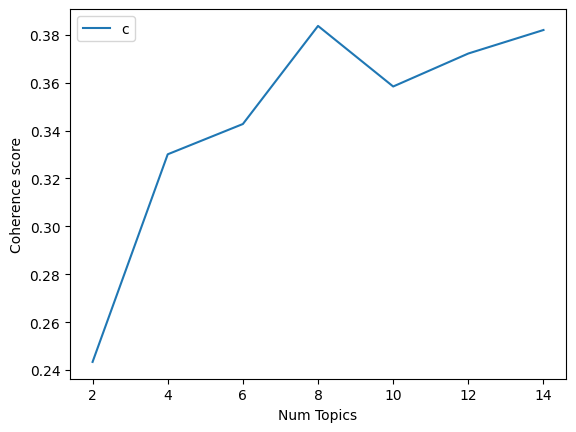

In [40]:
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [41]:
# Print the coherence scores
for m, cv in zip(x, coherence_values):
    print("Num Topics =", m, " has Coherence Value of", round(cv, 4))

Num Topics = 2  has Coherence Value of 0.2434
Num Topics = 4  has Coherence Value of 0.3301
Num Topics = 6  has Coherence Value of 0.3427
Num Topics = 8  has Coherence Value of 0.3837
Num Topics = 10  has Coherence Value of 0.3584
Num Topics = 12  has Coherence Value of 0.3722
Num Topics = 14  has Coherence Value of 0.382


Por lo tanto el numero de topicos optimos es 8

In [42]:
optimal_model = model_list[3]

In [43]:
archivo='./Optimal'

In [44]:
optimal_model.save(archivo)

In [45]:
from gensim.models import LdaModel

optimal_model = LdaModel.load(archivo, mmap='r')

In [46]:
# Visualize the topics
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(optimal_model, dataset, id2word)
vis

c:\Users\Spun\miniconda3\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  default_term_info = default_term_info.sort_values(


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
5     -0.036836 -0.140110       1        1  18.376373
1      0.099212 -0.028039       2        1  16.074822
4     -0.316260 -0.060641       3        1  13.981156
6      0.109827 -0.050865       4        1  13.614706
2      0.035552 -0.060927       5        1  11.568355
3      0.059566 -0.002531       6        1  10.440820
0     -0.061578  0.299686       7        1   9.408704
7      0.110517  0.043428       8        1   6.535063, topic_info=          Term        Freq       Total Category  logprob  loglift
81      música  855.000000  855.000000  Default  30.0000  30.0000
4191     banda  480.000000  480.000000  Default  29.0000  29.0000
635      casos  512.000000  512.000000  Default  28.0000  28.0000
864   artistas  354.000000  354.000000  Default  27.0000  27.0000
8166      niño  314.000000  314.000000  Default  26.0000  26.0000
...        ...         ...         ...      ...      ...      ...
87    personas   55.220045  761.504454   Topic8  -5.2561   0.1040
177      parte   44.823933  655.700905   Topic8  -5.4647   0.0450
232       país   41.817815  592.134939   Topic8  -5.5341   0.0776
715      lugar   36.455915  311.175104   Topic8  -5.6713   0.5837
106    trabajo   38.251556  480.237727   Topic8  -5.6233   0.1979

[470 rows x 6 columns], token_table=      Topic      Freq   Term
term                        
860       4  0.113466      $
860       5  0.138133      $
860       6  0.744930      $
8720      7  0.994383      '
1929      4  0.976419   2015
...     ...       ...    ...
203       6  0.121711   zona
203       7  0.068970   zona
203       8  0.060856   zona
4581      1  0.933680  época
4581      6  0.062945  época

[844 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[6, 2, 5, 7, 3, 4, 1, 8])

In [47]:
def format_topics_documents(ldamodel=None, corpus=df, texts=texts):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row_list in enumerate(ldamodel[corpus]):
        row = row_list[0] if ldamodel.per_word_topics else row_list            
        # print(row)
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)


df_topic_sents_keywords = format_topics_documents(ldamodel=optimal_model, corpus=dataset, texts=noticias)

# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']
df_dominant_topic.head(10)

C:\Users\Spun\AppData\Local\Temp\ipykernel_3368\4269230382.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)


,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text
0,0,1,0.6063,"casos, personas, semana, días, pandemia, regió...",Un recorrido por los locales en el Parque La ...
1,1,0,0.6280,"partido, puntos, equipo, compañeros, minutos, ...",Exhaustiva revisión de encomiendas y allanami...
2,2,7,0.5503,"migrantes, bienestar, clases, kilómetros, pers...",El Programa Territorial Integrado Ruta de los...
3,3,3,0.4408,"$, trabajo, millones, datos, proyecto, espacio...",La comisión de Educación del Senado determinó...
4,4,3,0.6173,"$, trabajo, millones, datos, proyecto, espacio...",Ello porque existe la posibilidad que la Cámar...
5,5,6,0.4442,"cámaras, alcalde, millones, sector, municipio,...",Por unanimidad el Concejo municipal de Castro ...
6,6,3,0.8586,"$, trabajo, millones, datos, proyecto, espacio...",Tras catorce años desde su anuncio y dos desd...
7,7,6,0.4196,"cámaras, alcalde, millones, sector, municipio,...",En la cita protocolar estuvieron presentes el ...
8,8,3,0.3995,"$, trabajo, millones, datos, proyecto, espacio...",1.400 millones de pesos anuales destinará el M...
9,9,2,0.4094,"mezcla, instrumento, presidente, ley, país, pr...",Desde las 9 de la mañana de este lunes comenzó...


In [48]:
media_outlet = df.filter(['media_outlet'], axis=1)
df_dominant_topic=df_dominant_topic.join(media_outlet)
df_dominant_topic

,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text,media_outlet
0,0,1,0.6063,"casos, personas, semana, días, pandemia, regió...",Un recorrido por los locales en el Parque La ...,radiosago
1,1,0,0.6280,"partido, puntos, equipo, compañeros, minutos, ...",Exhaustiva revisión de encomiendas y allanami...,radiosago
2,2,7,0.5503,"migrantes, bienestar, clases, kilómetros, pers...",El Programa Territorial Integrado Ruta de los...,radiosago
3,3,3,0.4408,"$, trabajo, millones, datos, proyecto, espacio...",La comisión de Educación del Senado determinó...,radiosago
4,4,3,0.6173,"$, trabajo, millones, datos, proyecto, espacio...",Ello porque existe la posibilidad que la Cámar...,radiosago
...,...,...,...,...,...,...
1497,1497,3,0.6227,"$, trabajo, millones, datos, proyecto, espacio...",Las últimas cifras de empleo en Chile son alen...,laestrelladechiloe
1498,1498,1,0.8075,"casos, personas, semana, días, pandemia, regió...",Más de 1.400 casos de Linfoma no Hodgkin se di...,laestrelladechiloe
1499,1499,4,0.7545,"música, tiempo, serie, mundo, año, momento, id...","Justo antes de la pandemia, Benjamín Vicuña vi...",laestrelladechiloe
1500,1500,4,0.7398,"música, tiempo, serie, mundo, año, momento, id...","Con 24 años, Esteban Cisterna, mejor conocido ...",laestrelladechiloe


In [49]:
#!pip install pandasql

In [50]:
from pandasql import sqldf 

In [51]:
result = sqldf("SELECT Dominant_Topic, count(*) as nb_noticias FROM df_dominant_topic GROUP BY Dominant_Topic ORDER BY count(*) DESC")
result

,Dominant_Topic,nb_noticias
0,4,231
1,1,216
2,0,205
3,2,197
4,5,196
5,6,173
6,3,161
7,7,123


## Topico 0

In [53]:
pd.options.display.max_colwidth = 1000

result = sqldf("SELECT * FROM df_dominant_topic WHERE dominant_topic=0 ORDER BY Topic_Perc_Contrib DESC LIMIT 1")
result

,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text,media_outlet
0,17,0,0.9456,"partido, puntos, equipo, compañeros, minutos, fecha, partidos, duelo, prueba, juego","Deportes Puerto Montt se impuso por la cuenta mínima ante Barnechea en partido disputado esta tarde en el estadio Bicentenario de Chinquihue, válido por la vigésimo primera fecha del campeonato de Primera B. El único gol del encuentro fue convertido por Camilo Melivilú en el minuto 18 del encuentro. Con este resultado el cuadro Velero se mantiene en el tercer lugar de la tabla de posiciones de la Primera B con 33 puntos. El próximo duelo de Deportes Puerto Montt será el próximo lunes 27 de septiembre, a las 20:30 horas, frente a Universidad de Concepción.FICHA TÉCNICAHora: 16:00Estadio: Bicentenario ChinquihueÁrbitro: Ángelo Hermosilla Deportes Puerto Monttt (1): Claudio González, Cegy Durán, Diego Opazo, Diego Subiabre, Juan Pablo Andrade, Nicolás Gauna, Eduardo Vilches (60′ Bryan Valdivia), Kevin Flores, Arnaldo Castillo (90+1′ Flavio Ciampicetti), Camilo Melivilú (75′ Christopher Ojeda), Cristián López (75′ Cristobal Vargas). DT Felipe Cornejo. AC Barnechea (0): Nicolás Gon...",radiosago


## Topico 1

In [54]:
pd.options.display.max_colwidth = 1000

result = sqldf("SELECT * FROM df_dominant_topic WHERE dominant_topic=1 ORDER BY Topic_Perc_Contrib DESC LIMIT 1")
result

,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text,media_outlet
0,332,1,0.9803,"casos, personas, semana, días, pandemia, región, contagios, horas, pacientes, variante","Nuevamente la provincia mostró excelentes cifras en relación al covid-19, donde este miércoles no se registraron nuevos casos de esta enfermedad. La seremi de Salud (s), Marcela Cárdenas, entregó el reporte regional de nuevos casos de este miércoles, el cual arrojó un total de tan sólo ocho, de los cuales Puerto Montt tiene 3, Puerto Varas 1, Ancud 3 y Quellón 1. La región a la fecha tiene un total de 112 casos activos, de los cuales 33 corresponden a la provincia de Osorno. En relación a los exámenes PCR realizados en laboratorios públicos y privados, a nivel regional se hicieron en total 913, con una positividad de 0,77%, de los cuales 269 corresponden a la provincia, donde la positividad alcanzó a 0%. En cuanto a la ocupación de residencias sanitarias, de un total de 400 camas en la región, hay una disponibilidad de 186. Con respecto a la situación de la red pública y privada de la región, hay un total de 43 pacientes hospitalizados, donde 14 de ellos se encuentran internados en...",elaustral


## Topico 2

In [55]:
pd.options.display.max_colwidth = 1000

result = sqldf("SELECT * FROM df_dominant_topic WHERE dominant_topic=2 ORDER BY Topic_Perc_Contrib DESC LIMIT 1")
result

,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text,media_outlet
0,287,2,0.8751,"mezcla, instrumento, presidente, ley, país, proyecto, candidato, elecciones, crisis, parte","El Departamento de Estado de EE.UU. afirmó ayer que las elecciones rusas para renovar la Duma o Cámara de Diputados, en las que el partido del Kremlin -Rusia Unida- renovó la mayoría constitucional, no se celebraron bajo ""unas condiciones justas y libres"". Así se expresó en un comunicado Ned Price, portavoz del Departamento de Estado, quien criticó ""la marginación de figuras políticas independientes"" debido a las leyes electorales. ""El uso por parte del Gobierno de Rusia de leyes sobre 'organizaciones extremistas', 'agentes extranjeros' y 'organizaciones indeseables' restringió gravemente el pluralismo e impidió que el pueblo ruso ejerciese sus derechos civiles y políticos"", agregó Price. Lamentó, además, que el Kremlin no permitiera la Organización para la Cooperación y la Seguridad en Europea (OSCE) enviar su misión electoral para comprobar el desarrollo de la jornada electoral, ""limitando así la transparencia esencial para unas elecciones justas"". El partido del Kremlin, Rusia U...",elaustral


## Topico 3

In [56]:
pd.options.display.max_colwidth = 1000

result = sqldf("SELECT * FROM df_dominant_topic WHERE dominant_topic=3 ORDER BY Topic_Perc_Contrib DESC LIMIT 1")
result

,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text,media_outlet
0,126,3,0.9701,"$, trabajo, millones, datos, proyecto, espacios, personas, país, turismo, parte","El Gobierno dio a conocer en las últimas horas la fecha de pago del IFE Universal de septiembre. De acuerdo a la información oficial, que ya aparece publicada en el sitio del Ingreso Familiar de Emergencia, los pagos comenzarán este jueves 30 de septiembre. También se anunció que en octubre se abrirá un nuevo periodo para los que aún no han postulado. Cabe recordar que el monto a pagar en septiembre será la mitad de lo que se entregó el último mes de agosto. MONTO IFE SEPTIEMBRE FAMILIA DE 1 PERSONA $88.500 FAMILIAS DE 2 PERSONAS $143.500 FAMILIAS DE 3 PERSONAS $200.000 FAMILIAS DE 4 PERSONAS $250.000 FAMILIAS DE 5 PERSONAS $273.000 FAMILIAS DE 6 PERSONAS $310.000 FAMILIAS DE 7 PERSONAS $345.000 FAMILIAS DE 8 PERSONAS $379.500 FAMILIAS DE 9 PERSONAS $412.000 FAMILIAS DE 10 PERSONAS O MÁS $443.500 Puedes ver también Consulta el nuevo monto que recibirás del IFE en septiembre",elrepuertero


## Topico 4

In [57]:
pd.options.display.max_colwidth = 1000

result = sqldf("SELECT * FROM df_dominant_topic WHERE dominant_topic=4 ORDER BY Topic_Perc_Contrib DESC LIMIT 1")
result

,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text,media_outlet
0,408,4,0.9421,"música, tiempo, serie, mundo, año, momento, idea, género, productor, actriz","Estudios Warner Bros. anunciaron un remake de ""El guardaespaldas"", la clásica película romántica de 1992 que inmortalizaron la fallecida Whitney Houston y Kevin Costner. Este nuevo proyecto tendrá al nominado al Tony (""The Inheritance"") Matthew López como guionista, mientras que la producción recaerá en Lawrence Kasdan, guionista y productor de la cinta original. Hasta el momento el proyecto no tiene un elenco confirmado.",laestrelladechiloe


## Topico 5

In [58]:
pd.options.display.max_colwidth = 1000

result = sqldf("SELECT * FROM df_dominant_topic WHERE dominant_topic=5 ORDER BY Topic_Perc_Contrib DESC LIMIT 1")
result

,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text,media_outlet
0,389,5,0.9899,"banda, años, artistas, niño, hecho, escenario, casa, mayo, disposición, época","La música de Mozart, en concreto escuchar al menos 30 segundos de la sonata para dos pianos re mayor (K448), puede ser buena para las personas con epilepsia resistente a la medicación, según un estudio que publica Scientific Reports. Escuchar esa sonata ""puede estar asociado"" a peaks menos frecuentes de actividad eléctrica asociada a la epilepsia, algo que ya habían indicado estudio previos, pero un equipo de la Escuela de Medicina Geisel (Estados Unidos) determinó el tiempo mínimo que hay que hacerlo y avanza una hipótesis sobre los motivos. Los resultados de la investigación también sugieren que las respuestas emocionales positivas al K448 pueden contribuir a sus efectos terapéuticos. El equipo plantea la hipótesis de que escuchar esa sonata durante tan solo 30 segundos puede activar redes cerebrales asociadas a respuestas emocionales positivas a la música y reguladas por el córtex frontal. La activación de estas redes puede contribuir -sugieren- a la reducción de los peaks de ac...",elaustral


## Topico 6

In [59]:
pd.options.display.max_colwidth = 1000

result = sqldf("SELECT * FROM df_dominant_topic WHERE dominant_topic=6 ORDER BY Topic_Perc_Contrib DESC LIMIT 1")
result

,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text,media_outlet
0,70,6,0.9443,"cámaras, alcalde, millones, sector, municipio, pesos, investigación, vecinos, comuna, día","El organismo está fomentando el financiamiento crediticio para la adquisición de herramientas tecnológicas, como computadores, impresoras, celulares y paquetes de internet como una forma de apoyar el trabajo productivo de la pequeña agricultura. El organismo está fomentando el financiamiento crediticio para la adquisición de herramientas tecnológicas, como computadores, impresoras, celulares y paquetes de internet como una forma de apoyar el trabajo productivo de la pequeña agricultura. Por efecto de la pandemia han quedado en evidencia algunas realidades que afectaron a la agricultura y las cadenas de comercialización y producción relacionadas con ella. Es por eso que INDAP ha priorizado durante los últimos meses herramientas tecnológicas entre sus usuarios y usuarias para acortar la brecha digital que aún existe en el mundo rural para que mejore también sus conocimientos en alfabetización digital. Un trabajo que destacó el director regional de INDAP, Carlos Gómez, en su visita a ...",elheraldoaustral


## Topico 7

In [60]:
pd.options.display.max_colwidth = 1000

result = sqldf("SELECT * FROM df_dominant_topic WHERE dominant_topic=7 ORDER BY Topic_Perc_Contrib DESC LIMIT 1")
result

,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text,media_outlet
0,379,7,0.8429,"migrantes, bienestar, clases, kilómetros, personas, incendio, autoridades, educación, crisis, convencional","Más de 10.000 inmigrantes irregulares, en su mayoría de nacionalidad haitiana, están retenidos por las autoridades estadounidenses en un campamento improvisado en el sur de Texas tras un cruce masivo en la frontera. Los migrantes han estado cruzando desde el martes a Estados Unidos por la zona Del Río (Texas) y desbordaron a las autoridades migratorias, que improvisaron el campamento debajo del puente internacional que conecta con Ciudad Acuña (México) a la espera de procesar solicitudes de asilo. Estos cerca de 10.000 migrantes, según cifras de las autoridades locales, duermen al raso y carecen de servicios básicos, condiciones que amenazan con crear una nueva emergencia humanitaria en la frontera sur. El límite entre Texas y México registra cifras récord en ingresos de migrantes irregulares desde que Joe Biden asumió el poder en enero y ya ha sido foco de una crisis política para el nuevo presidente. Según The Washington Post, muchos de los migrantes haitianos que llegaron a Texa...",elaustral


# Nombrar Topicos

4 -> Cine

1 -> Pandemia

0 -> Deportes

2 -> Politica

5 -> Cultura

6 -> Financiamiento herramientas tecnologica par agricultura

3 -> Pago IFE

7 -> Noticias internacionales inmigrantes





# Topicos importantes por comuna

In [62]:
comunas = [
    'Ancud', 
    'Castro',
    'Chonchi',
    'Curaco de Vélez',
    'Dalcahue',
    'Puqueldón',
    'Queilén',
    'Quemchi',
    'Quellón',
    'Quinchao',
    'Calbuco',
    'Cochamó',
    'Fresia',
    'Frutillar',
    'Llanquihue',
    'Los Muermos',
    'Maullín',
    'Puerto Montt',
    'Puerto Varas',   
    'Osorno',
    'Puerto Octay',
    'Purranque',
    'Puyehue',
    'Río Negro',
    'San Juan de la Costa',
    'San Pablo',
    'Chaitén',
    'Futaleufú',
    'Hualaihué',
    'Palena'
]


## Topico 0

In [143]:
pd.options.display.max_colwidth = 1000

class comunasLosLagos:
    def __init__(self, comuna, topico):
        self.comuna = comuna
        self.topico = topico
        self.veces = 0

# creacion de arreglo con comunas
arregloComunas = []
for comuna in comunas:
    arregloComunas.append(comunasLosLagos(comuna,0));

arregloComunas[1].comuna

result = sqldf("SELECT * FROM df_dominant_topic WHERE dominant_topic=0 ORDER BY Topic_Perc_Contrib")
comunasTopico = []
for comuna in comunas:
    for resultado in result.Text:
        esta = comuna in resultado
        if(esta == True):
            comunasTopico.append(comuna)

for acomuna in arregloComunas:
    for comunaTopico in comunasTopico:
        if acomuna.comuna == comunaTopico:
            acomuna.veces += 1

dfTopicoZero = pd.DataFrame()
comunas = []
topicos = []
veces = []

for arregloComuna in arregloComunas:
    comunas.append(arregloComuna.comuna)
    topicos.append(arregloComuna.topico)
    veces.append(arregloComuna.veces)

dfTopicoZero['Comuna'] = comunas
dfTopicoZero['Topico'] = topicos
dfTopicoZero['Veces'] = veces

dfTopicoZero

,Comuna,Topico,Veces
0,Ancud,0,1
1,Castro,0,4
2,Chonchi,0,0
3,Curaco de Vélez,0,0
4,Dalcahue,0,3
5,Puqueldón,0,0
6,Queilén,0,0
7,Quemchi,0,0
8,Quellón,0,3
9,Quinchao,0,3


In [139]:
#!pip install geopandas

## Topico 1

In [148]:
pd.options.display.max_colwidth = 1000

class comunasLosLagos:
    def __init__(self, comuna, topico):
        self.comuna = comuna
        self.topico = topico
        self.veces = 0


# creacion de arreglo con comunas
arregloComunas = []
for comuna in comunas:
    arregloComunas.append(comunasLosLagos(comuna,1))

result = sqldf("SELECT * FROM df_dominant_topic WHERE dominant_topic=1 ORDER BY Topic_Perc_Contrib")
comunasTopico = []
for comuna in comunas:
    for resultado in result.Text:
        esta = comuna in resultado
        if(esta == True):
            comunasTopico.append(comuna)

for acomuna in arregloComunas:
    for comunaTopico in comunasTopico:
        if acomuna.comuna == comunaTopico:
            acomuna.veces += 1

dfTopicoOne = pd.DataFrame()
comunas = []
topicos = []
veces = []

for arregloComuna in arregloComunas:
    comunas.append(arregloComuna.comuna)
    topicos.append(arregloComuna.topico)
    veces.append(arregloComuna.veces)

dfTopicoOne['Comuna'] = comunas
dfTopicoOne['Topico'] = topicos
dfTopicoOne['Veces'] = veces

dfTopicoOne = dfTopicoOne.sort_values('Veces', ascending=False)
dfTopicoOne



,Comuna,Topico,Veces
17,Puerto Montt,1,59
0,Ancud,1,43
19,Osorno,1,42
5,Puqueldón,1,42
1,Castro,1,37
8,Quellón,1,33
14,Llanquihue,1,26
7,Quemchi,1,22
28,Hualaihué,1,21
29,Palena,1,18


## Topico 2

In [149]:
pd.options.display.max_colwidth = 1000

class comunasLosLagos:
    def __init__(self, comuna, topico):
        self.comuna = comuna
        self.topico = topico
        self.veces = 0


# creacion de arreglo con comunas
arregloComunas = []
for comuna in comunas:
    arregloComunas.append(comunasLosLagos(comuna,2))

result = sqldf("SELECT * FROM df_dominant_topic WHERE dominant_topic=2 ORDER BY Topic_Perc_Contrib")
comunasTopico = []
for comuna in comunas:
    for resultado in result.Text:
        esta = comuna in resultado
        if(esta == True):
            comunasTopico.append(comuna)

for acomuna in arregloComunas:
    for comunaTopico in comunasTopico:
        if acomuna.comuna == comunaTopico:
            acomuna.veces += 1

dfTopicoTwo = pd.DataFrame()
comunas = []
topicos = []
veces = []

for arregloComuna in arregloComunas:
    comunas.append(arregloComuna.comuna)
    topicos.append(arregloComuna.topico)
    veces.append(arregloComuna.veces)

dfTopicoTwo['Comuna'] = comunas
dfTopicoTwo['Topico'] = topicos
dfTopicoTwo['Veces'] = veces

dfTopicoTwo = dfTopicoTwo.sort_values('Veces', ascending=False)
dfTopicoTwo

,Comuna,Topico,Veces
19,Osorno,1,6
17,Puerto Montt,1,5
14,Llanquihue,1,5
1,Castro,1,4
0,Ancud,1,4
8,Quellón,1,3
4,Dalcahue,1,3
2,Chonchi,1,3
18,Puerto Varas,1,2
21,Purranque,1,2


## Topico 3

In [152]:
pd.options.display.max_colwidth = 1000

class comunasLosLagos:
    def __init__(self, comuna, topico):
        self.comuna = comuna
        self.topico = topico
        self.veces = 0


# creacion de arreglo con comunas
arregloComunas = []
for comuna in comunas:
    arregloComunas.append(comunasLosLagos(comuna,3))

result = sqldf("SELECT * FROM df_dominant_topic WHERE dominant_topic=3 ORDER BY Topic_Perc_Contrib")
comunasTopico = []
for comuna in comunas:
    for resultado in result.Text:
        esta = comuna in resultado
        if(esta == True):
            comunasTopico.append(comuna)

for acomuna in arregloComunas:
    for comunaTopico in comunasTopico:
        if acomuna.comuna == comunaTopico:
            acomuna.veces += 1

dfTopicoTree = pd.DataFrame()
comunas = []
topicos = []
veces = []

for arregloComuna in arregloComunas:
    comunas.append(arregloComuna.comuna)
    topicos.append(arregloComuna.topico)
    veces.append(arregloComuna.veces)

dfTopicoTree['Comuna'] = comunas
dfTopicoTree['Topico'] = topicos
dfTopicoTree['Veces'] = veces

dfTopicoTree = dfTopicoTree.sort_values('Veces', ascending=False)
dfTopicoTree

,Comuna,Topico,Veces
0,Ancud,3,27
17,Puerto Montt,3,27
1,Castro,3,25
2,Chonchi,3,19
8,Quellón,3,17
14,Llanquihue,3,17
19,Osorno,3,15
4,Dalcahue,3,14
18,Puerto Varas,3,7
3,Curaco de Vélez,3,6


## Topico 4

In [155]:
pd.options.display.max_colwidth = 1000

class comunasLosLagos:
    def __init__(self, comuna, topico):
        self.comuna = comuna
        self.topico = topico
        self.veces = 0


# creacion de arreglo con comunas
arregloComunas = []
for comuna in comunas:
    arregloComunas.append(comunasLosLagos(comuna,4))

result = sqldf("SELECT * FROM df_dominant_topic WHERE dominant_topic=4 ORDER BY Topic_Perc_Contrib")
comunasTopico = []
for comuna in comunas:
    for resultado in result.Text:
        esta = comuna in resultado
        if(esta == True):
            comunasTopico.append(comuna)

for acomuna in arregloComunas:
    for comunaTopico in comunasTopico:
        if acomuna.comuna == comunaTopico:
            acomuna.veces += 1

dfTopicoFour = pd.DataFrame()
comunas = []
topicos = []
veces = []

for arregloComuna in arregloComunas:
    comunas.append(arregloComuna.comuna)
    topicos.append(arregloComuna.topico)
    veces.append(arregloComuna.veces)

dfTopicoFour['Comuna'] = comunas
dfTopicoFour['Topico'] = topicos
dfTopicoFour['Veces'] = veces

dfTopicoFour = dfTopicoFour.sort_values('Veces', ascending=False)
dfTopicoFour

,Comuna,Topico,Veces
1,Castro,4,18
17,Puerto Montt,4,17
14,Llanquihue,4,12
0,Ancud,4,5
18,Puerto Varas,4,5
19,Osorno,4,4
2,Chonchi,4,3
4,Dalcahue,4,3
5,Puqueldón,4,3
8,Quellón,4,3


## Topico 5

In [156]:
pd.options.display.max_colwidth = 1000

class comunasLosLagos:
    def __init__(self, comuna, topico):
        self.comuna = comuna
        self.topico = topico
        self.veces = 0


# creacion de arreglo con comunas
arregloComunas = []
for comuna in comunas:
    arregloComunas.append(comunasLosLagos(comuna,5))

result = sqldf("SELECT * FROM df_dominant_topic WHERE dominant_topic=5 ORDER BY Topic_Perc_Contrib")
comunasTopico = []
for comuna in comunas:
    for resultado in result.Text:
        esta = comuna in resultado
        if(esta == True):
            comunasTopico.append(comuna)

for acomuna in arregloComunas:
    for comunaTopico in comunasTopico:
        if acomuna.comuna == comunaTopico:
            acomuna.veces += 1

dfTopicoFive = pd.DataFrame()
comunas = []
topicos = []
veces = []

for arregloComuna in arregloComunas:
    comunas.append(arregloComuna.comuna)
    topicos.append(arregloComuna.topico)
    veces.append(arregloComuna.veces)

dfTopicoFive['Comuna'] = comunas
dfTopicoFive['Topico'] = topicos
dfTopicoFive['Veces'] = veces

dfTopicoFive = dfTopicoFive.sort_values('Veces', ascending=False)
dfTopicoFive

,Comuna,Topico,Veces
1,Castro,5,31
19,Osorno,5,29
17,Puerto Montt,5,19
0,Ancud,5,17
9,Quinchao,5,9
28,Hualaihué,5,9
14,Llanquihue,5,9
29,Palena,5,9
23,Río Negro,5,8
25,San Pablo,5,7


## Topico 6

In [157]:
pd.options.display.max_colwidth = 1000

class comunasLosLagos:
    def __init__(self, comuna, topico):
        self.comuna = comuna
        self.topico = topico
        self.veces = 0


# creacion de arreglo con comunas
arregloComunas = []
for comuna in comunas:
    arregloComunas.append(comunasLosLagos(comuna,6))

result = sqldf("SELECT * FROM df_dominant_topic WHERE dominant_topic=6 ORDER BY Topic_Perc_Contrib")
comunasTopico = []
for comuna in comunas:
    for resultado in result.Text:
        esta = comuna in resultado
        if(esta == True):
            comunasTopico.append(comuna)

for acomuna in arregloComunas:
    for comunaTopico in comunasTopico:
        if acomuna.comuna == comunaTopico:
            acomuna.veces += 1

dfTopicoSix = pd.DataFrame()
comunas = []
topicos = []
veces = []

for arregloComuna in arregloComunas:
    comunas.append(arregloComuna.comuna)
    topicos.append(arregloComuna.topico)
    veces.append(arregloComuna.veces)

dfTopicoSix['Comuna'] = comunas
dfTopicoSix['Topico'] = topicos
dfTopicoSix['Veces'] = veces

dfTopicoSix = dfTopicoSix.sort_values('Veces', ascending=False)
dfTopicoSix

,Comuna,Topico,Veces
17,Puerto Montt,6,33
0,Ancud,6,23
1,Castro,6,19
19,Osorno,6,15
14,Llanquihue,6,14
10,Calbuco,6,13
2,Chonchi,6,12
18,Puerto Varas,6,12
16,Maullín,6,11
22,Puyehue,6,7


## Topico 7

In [158]:
pd.options.display.max_colwidth = 1000

class comunasLosLagos:
    def __init__(self, comuna, topico):
        self.comuna = comuna
        self.topico = topico
        self.veces = 0


# creacion de arreglo con comunas
arregloComunas = []
for comuna in comunas:
    arregloComunas.append(comunasLosLagos(comuna,7))

result = sqldf("SELECT * FROM df_dominant_topic WHERE dominant_topic=7 ORDER BY Topic_Perc_Contrib")
comunasTopico = []
for comuna in comunas:
    for resultado in result.Text:
        esta = comuna in resultado
        if(esta == True):
            comunasTopico.append(comuna)

for acomuna in arregloComunas:
    for comunaTopico in comunasTopico:
        if acomuna.comuna == comunaTopico:
            acomuna.veces += 1

dfTopicoSeven = pd.DataFrame()
comunas = []
topicos = []
veces = []

for arregloComuna in arregloComunas:
    comunas.append(arregloComuna.comuna)
    topicos.append(arregloComuna.topico)
    veces.append(arregloComuna.veces)

dfTopicoSeven['Comuna'] = comunas
dfTopicoSeven['Topico'] = topicos
dfTopicoSeven['Veces'] = veces

dfTopicoSeven = dfTopicoSeven.sort_values('Veces', ascending=False)
dfTopicoSeven

,Comuna,Topico,Veces
17,Puerto Montt,7,20
1,Castro,7,7
26,Chaitén,7,6
0,Ancud,7,5
19,Osorno,7,5
14,Llanquihue,7,3
29,Palena,7,3
2,Chonchi,7,3
4,Dalcahue,7,3
5,Puqueldón,7,2


# Analisis

In [162]:
dfTopicoZero.head(5) # Deportes

,Comuna,Topico,Veces
0,Ancud,0,1
1,Castro,0,4
2,Chonchi,0,0
3,Curaco de Vélez,0,0
4,Dalcahue,0,3


In [164]:
dfTopicoOne.head(5) #  Pandemia

,Comuna,Topico,Veces
17,Puerto Montt,1,59
0,Ancud,1,43
19,Osorno,1,42
5,Puqueldón,1,42
1,Castro,1,37


In [165]:
dfTopicoTwo.head(5) # Politica

,Comuna,Topico,Veces
19,Osorno,1,6
17,Puerto Montt,1,5
14,Llanquihue,1,5
1,Castro,1,4
0,Ancud,1,4


In [166]:
dfTopicoTree.head(5) #  Pago IFE

,Comuna,Topico,Veces
0,Ancud,3,27
17,Puerto Montt,3,27
1,Castro,3,25
2,Chonchi,3,19
8,Quellón,3,17


In [167]:
dfTopicoFour.head(5) # Cine

,Comuna,Topico,Veces
1,Castro,4,18
17,Puerto Montt,4,17
14,Llanquihue,4,12
0,Ancud,4,5
18,Puerto Varas,4,5


In [168]:
dfTopicoFive.head(5) # Cultura

,Comuna,Topico,Veces
1,Castro,5,31
19,Osorno,5,29
17,Puerto Montt,5,19
0,Ancud,5,17
9,Quinchao,5,9


In [169]:
dfTopicoSix.head(5) #  Financiamiento Herramientas tecnologicas para agricultura

,Comuna,Topico,Veces
17,Puerto Montt,6,33
0,Ancud,6,23
1,Castro,6,19
19,Osorno,6,15
14,Llanquihue,6,14


In [170]:
dfTopicoSeven.head(5) #  Noticias internacionales inmigrantes

,Comuna,Topico,Veces
17,Puerto Montt,7,20
1,Castro,7,7
26,Chaitén,7,6
0,Ancud,7,5
19,Osorno,7,5


Como se puede observar la mayor concentracion de noticias se encuentra en los topicos de Pandemia, Financiamiento para herramientas tecnologicas para agricultura y Cultura. Es importante mencionar que resulta curioso que no se mencione nada acerca de accidentes relacionado a las fiestas patrias ya que las fechas que se escogieron son de la semana del 18 del año 2021. Esto puede ser debido a que en esa fecha estaban todas las regulaciones dadas por el covid. lo cual se puede ver en el topico Pandemia el cual es el mas abundante en estas fechas.